# Задание 1
Определить два вектора, представляющие собой число автомобилей, припаркованных в течении
5 рабочих дней у бизнес-центра на уличной стоянке и в подземном гараже

| День | Улица | Гараж |
| :-: | :--: | :--: |
| Понедельник | 80 | 100 |
| Вторник | 98 | 82 |
| Среда | 75 | 105 |
| Четверг | 91 | 89 |
| Пятница | 78 | 102

Найти и интерпретировать корреляцию между переменными «Улица» и
«Гараж» (подсчитать корреляцию по Пирсону).

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import scipy.stats as sts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')

In [148]:
warnings.filterwarnings('ignore')

street = [80, 98, 75, 91, 78]
garage = [100, 82, 105, 89, 102]

correlation = np.corrcoef(street, garage)[0, 1]
print('Коэффициент корреляции Пирсона: ', correlation)

Коэффициент корреляции Пирсона:  -0.9999999999999998


# Задание 2
Построить диаграмму рассеяния

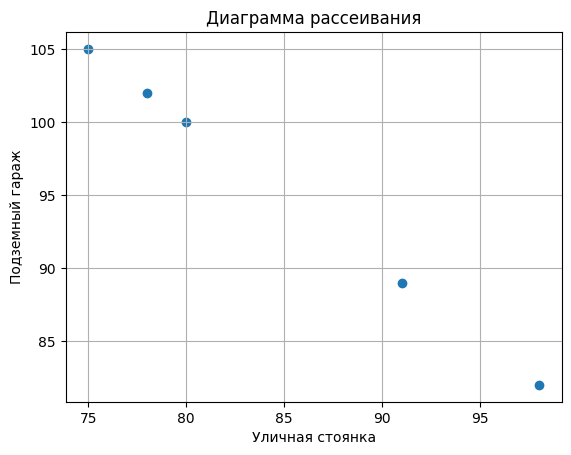

In [149]:
plt.grid()
plt.scatter(street, garage)
plt.xlabel('Уличная стоянка')
plt.ylabel('Подземный гараж')
plt.title('Диаграмма рассеивания')
plt.show()

# Задание 3
Загрузить bitcoin.csv.

In [150]:
data = pd.read_csv('bitcoin.csv', sep=',')
data

,Unnamed: 0,time,high,low,open,volumefrom,volumeto,close
0,0,2015-12-20,462.76,431.10,461.20,121531.64,5.431648e+07,441.78
1,1,2015-12-21,445.54,423.99,441.78,121990.88,5.327022e+07,437.59
2,2,2015-12-22,443.22,433.25,437.59,65785.54,2.884554e+07,437.03
3,3,2015-12-23,444.78,434.28,437.03,63247.04,2.787735e+07,442.43
4,4,2015-12-24,460.62,441.76,442.43,79604.01,3.609666e+07,452.98
...,...,...,...,...,...,...,...,...
1996,1996,2021-06-07,36790.39,33367.12,35798.57,52209.55,1.850311e+09,33582.86
1997,1997,2021-06-08,34061.09,31034.35,33582.86,88483.79,2.890313e+09,33409.38
1998,1998,2021-06-09,37528.42,32435.18,33409.38,92280.57,3.249554e+09,37391.58
1999,1999,2021-06-10,38387.20,35821.05,37391.58,63052.49,2.338112e+09,36680.78


# Задание 4
Убрать из данных для обучения модели последние 14 дней.

In [159]:
projection = 14
data['predict'] = data['close'].shift(-projection)
X = pd.DataFrame(data['close'])
y = pd.DataFrame(data['predict'])
X = np.array(X, type(float))
y = np.array(y, type(float))
x_predict = X[-projection:]
X = X[:-projection]
y = y[:-projection]

array([[430.7],
       [433.32],
       [431.2],
       ...,
       [37391.58],
       [36680.78],
       [36843.33]], dtype=object)

# Задание 5
 Предсказать стоимость криптовалюты на следующие 14 дней с помощью линейной регрессии.

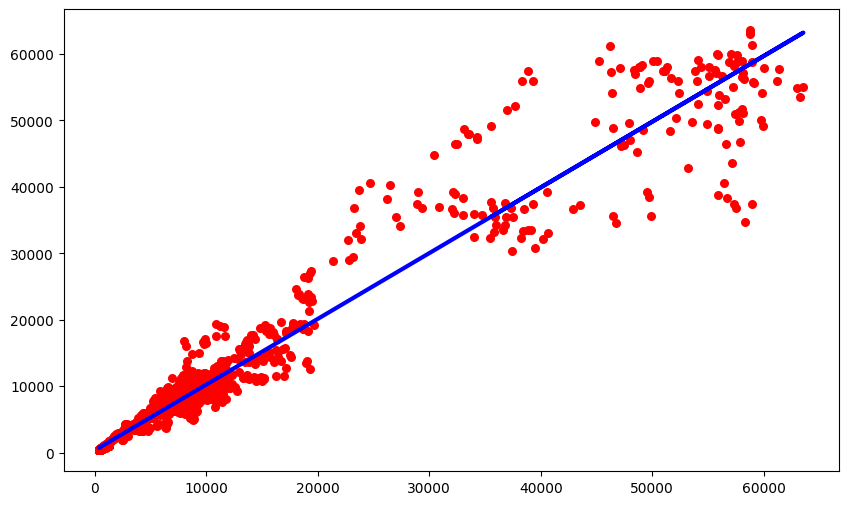

In [160]:
regression = LinearRegression()
regression.fit(X, y)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='red', marker='o', s=30)
plt.plot(X, regression.predict(X), color='blue', linewidth=3)
plt.show()

# Задание 6
Предсказать стоимость криптовалюты на следующие 14 дней с помощью линейной регрессии.

In [171]:
r2 = r2_score(y, X)
r2

0.9485303458597727

# Задание 7
Вывести угол наклона и y-перехват.

In [172]:
print('Наклон прямой: ', regression.coef_[0][0])
print('Y-перехват: ', regression.intercept_[0])

Наклон прямой:  0.9889372943721854
Y-перехват:  354.08558180726686
